In [3]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.signal import find_peaks

In [26]:
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse

 
    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)

 
    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)

 
    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise

 
    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander

 
    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference

 
    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]

 
    return ecg_data

 
ecg_data = generate_ecg_data(10, 250)
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse

    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)

    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)

    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise

    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander

    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference

    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]

    return ecg_data
sampling_rate = 250
ecg_data = generate_ecg_data(10, sampling_rate)

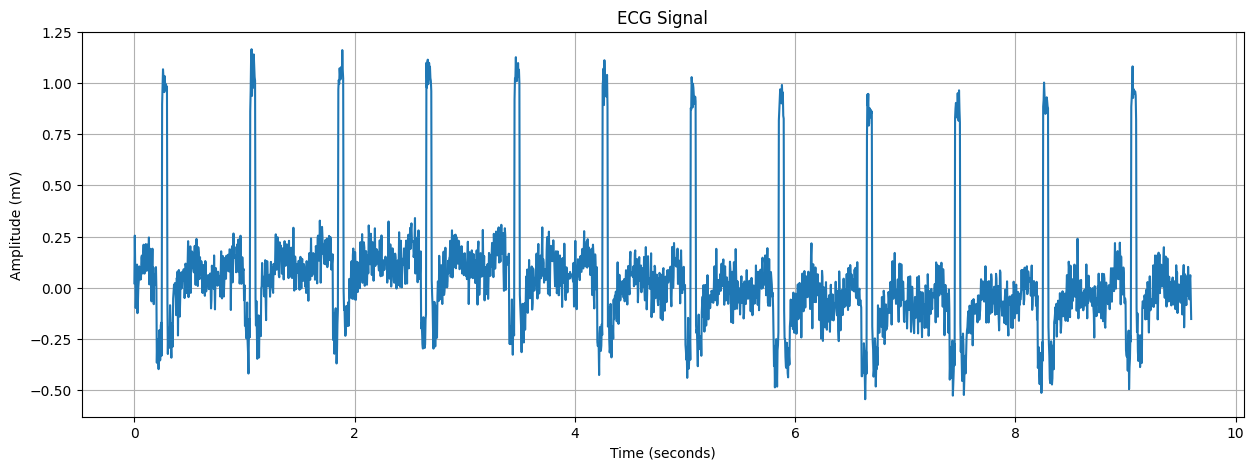

In [27]:
# Create time array
t = np.arange(len(ecg_data)) / sampling_rate

# Create the plot
plt.figure(figsize=(15, 5))
plt.plot(t, ecg_data)
plt.title('ECG Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (mV)')
plt.grid(True)
plt.show()


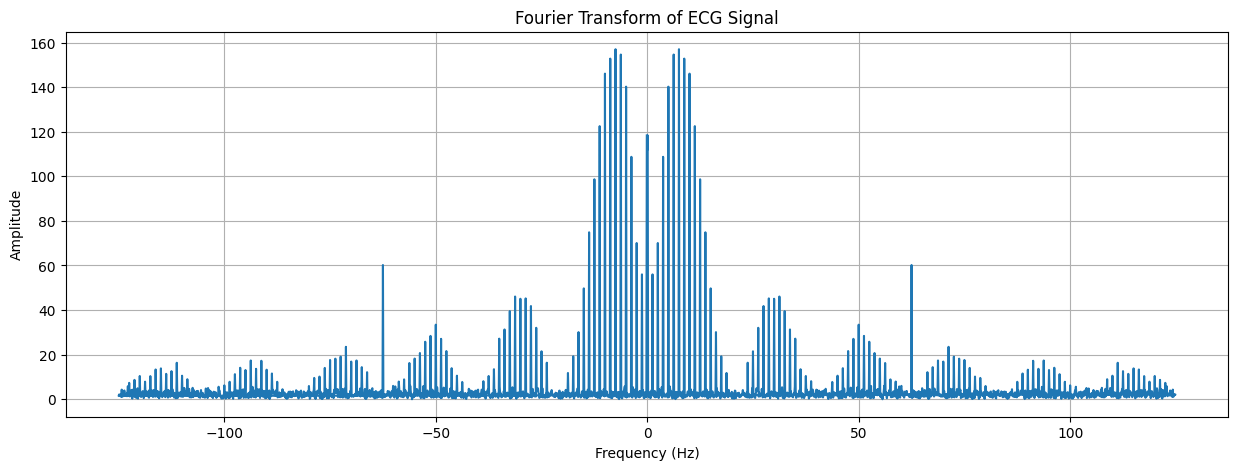

In [28]:
fft_ecg = fft(ecg_data)
frequencies = np.fft.fftfreq(len(ecg_data), 1 / sampling_rate)
plt.figure(figsize=(15, 5))
plt.plot(frequencies, np.abs(fft_ecg))
plt.title('Fourier Transform of ECG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


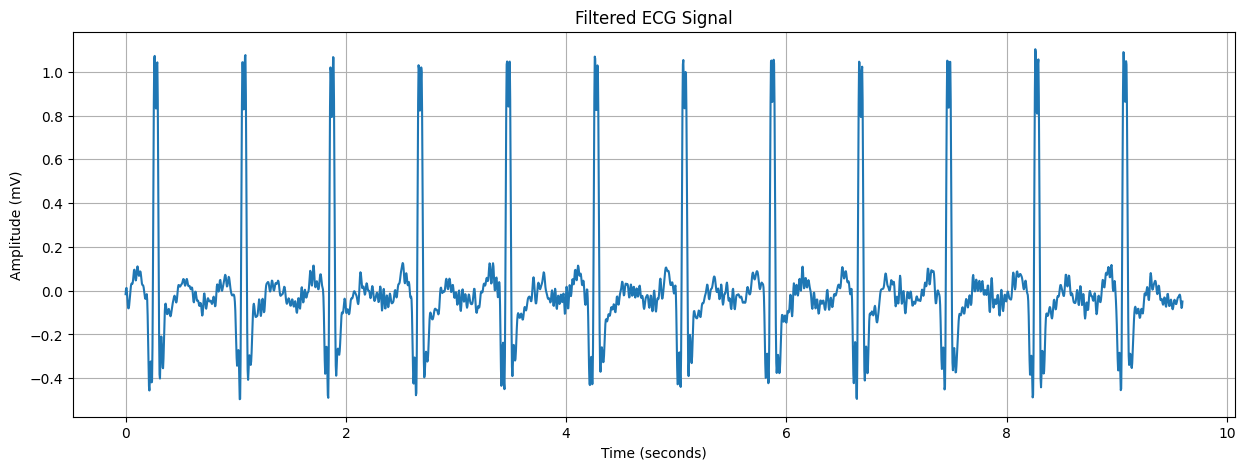

In [29]:
# Define bandpass filter parameters
low_freq = 0.5  # Lower cutoff frequency in Hz
high_freq = 40  # Upper cutoff frequency in Hz

# Create bandpass mask
mask = (np.abs(frequencies) >= low_freq) & (np.abs(frequencies) <= high_freq)
filtered_fft = fft_ecg * mask

# Apply inverse FFT to get filtered signal
filtered_ecg = ifft(filtered_fft).real

# Plot the filtered signal
plt.figure(figsize=(15, 5))
plt.plot(t, filtered_ecg)
plt.title('Filtered ECG Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (mV)')
plt.grid(True)
plt.show()


In [30]:
# Find peaks in the filtered ECG signal
peaks, _ = find_peaks(filtered_ecg, height=0.5*np.max(filtered_ecg), distance=sampling_rate*0.5)

# Calculate time between peaks (RR intervals) in seconds
rr_intervals = np.diff(peaks) / sampling_rate

# Calculate the average interval
average_interval = np.mean(rr_intervals)

# Calculate heart rate in beats per minute for each interval
heart_rate = 60 / average_interval

print(f"Average Heart Rate: {heart_rate:.1f} BPM")

Average Heart Rate: 75.0 BPM


A fourier transform decomposes a complex signal into component sinusoids that can be more easily processed. The Fourier transform plot shows the amplitude of each signal over the range of frequencies of these various sinusoids. This allows for the component frequencies to be identified and processed separately. The bandpass filter selectively removes frequencies outside of the range of interest (for the most part, the sinusoids with the highest amplitudes). The inverse fourier transform is then used to reconstruct the signal with the unwanted frequencies removed. The peaks in the filtered signal can then be detected and used to calculate the heart rate.
I also learned that the cursor AI is pretty cool.